# download data for cloud

In [88]:
from download_file import *

In [2]:
url = "https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip"
download_dir = '..//..//datasets_collection//Traffic_Sign_Classifier'
maybe_download_and_extract(url, download_dir)

- Download progress: 100.0%
Download finished. Extracting files.
Done.


# importing some useful packages

In [1]:
import os
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import math
import cv2
import time as time
from sklearn.preprocessing import OneHotEncoder
from sklearn.cross_validation import train_test_split
import numpy as np
%matplotlib inline
import tensorflow as tf
from PIL import Image
import time
from datetime import timedelta
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix

D:\Anaconda_36\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [21]:
import keras
from keras.models import Sequential
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras import regularizers, optimizers

# Read data

In [2]:
def OHE_labels(Y_tr,N_classes):
    OHC = OneHotEncoder()
    
    Y_ohc = OHC.fit(np.arange(N_classes).reshape(-1, 1))
    Y_labels = Y_ohc.transform(Y_tr.reshape(-1, 1)).toarray()
    return Y_labels

In [3]:
def read_data_sets(file):
    """
    Load pickled data
    args:
        file   (str)     path to datasets 
    yields:
        features and label of datasets (numpy array)
    """
    with open(file, mode='rb') as f:
        return pickle.load(f)

In [4]:
# Load pickled data
import pickle

data_rel_path = "..\\..\\datasets_collection\\Traffic_Sign_Classifier"
#"aug_train_600"

train = read_data_sets(os.path.join(data_rel_path, "aug_train_600.p"))
valid= read_data_sets(os.path.join(data_rel_path, "valid.p")) 
test = read_data_sets(os.path.join(data_rel_path, "test.p")) 

    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']
X_valid, y_valid = valid['features'], valid['labels']
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

In [5]:
def check_OHE(cls,y):
    check = np.linalg.norm(np.argmax(cls,axis=1)-y)
    if check == 0:
        print('One hot encoding correct, ok to proceed')
    else:
        print('One hot encoding doesnt match the output, check code!!!')

In [6]:
data_pd = pd.read_csv(os.path.join(data_rel_path, 'signnames.csv'))

In [7]:
check_OHE(labels_test,y_test)
check_OHE(labels_train,y_train)

One hot encoding correct, ok to proceed
One hot encoding correct, ok to proceed


# Dataset Exploration

## Dataset Summary

In [8]:
n_train = len(y_train)
n_test = len(y_test)
image_shape = np.shape(X_train[1])
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 41469
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


## Exploratory Visualization

In [9]:
def plot_random_3C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot])
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()
def plot_random_1C(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(X[ind_plot],cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()   
def plot_random_preprocess(n_row,n_col,X,y):

    plt.figure(figsize = (11,8))
    gs1 = gridspec.GridSpec(n_row,n_row)
    gs1.update(wspace=0.01, hspace=0.02) # set the spacing between axes. 

    for i in range(n_row*n_col):
        # i = i + 1 # grid spec indexes from 0
        ax1 = plt.subplot(gs1[i])
        plt.axis('on')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])
        ax1.set_aspect('equal')
        #plt.subplot(4,11,i+1)
        ind_plot = np.random.randint(1,len(y))
        plt.imshow(pre_process_image(X[ind_plot]),cmap='gray')
        plt.text(2,4,str(y[ind_plot]),
             color='k',backgroundcolor='c')
        plt.axis('off')
    plt.show()

### original images

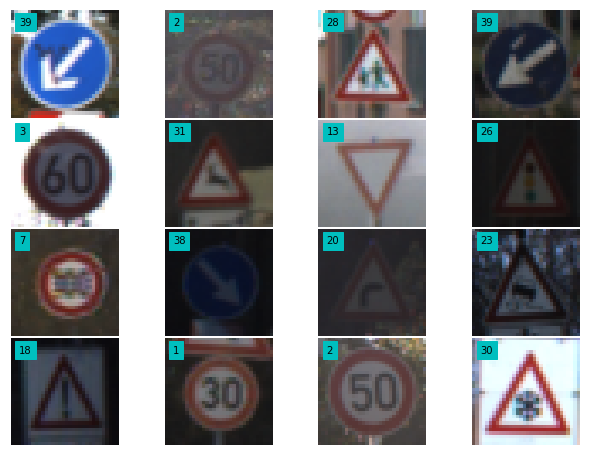

In [10]:
plot_random_3C(4,4,X_train,y_train)

### images after equalization 

In [11]:
def pre_process_image(image):

    #image = cv2.cvtColor(image, cv2.COLOR_BGR2YUV)
    #image = image[:,:,0]
    image[:,:,0] = cv2.equalizeHist(image[:,:,0])
    image[:,:,1] = cv2.equalizeHist(image[:,:,1])
    image[:,:,2] = cv2.equalizeHist(image[:,:,2])
    image = image/255.-.5
    #image = cv2.resize(image, (img_resize,img_resize),interpolation = cv2.INTER_CUBIC)
    return image

In [12]:
img_resize = 32
N_classes = 43
image_shape = (img_resize,img_resize)
img_size_flat = img_resize*img_resize

image_GS_train = np.array([pre_process_image(X_train[i]) for i in range(len(X_train))],
                          dtype = np.float32)
image_GS_test = np.array([pre_process_image(X_test[i]) for i in range(len(X_test))],
                          dtype = np.float32)

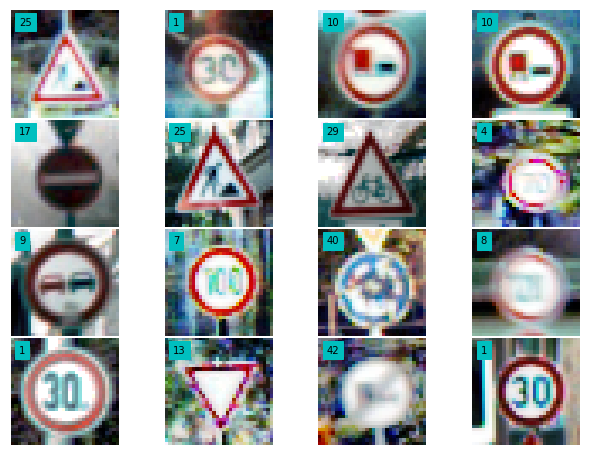

In [13]:
plot_random_3C(4,4,image_GS_train+.5,y_train)

### frequency table of training set

In [14]:
data_i = [[i,sum(y_train == i)] for i in range(len(np.unique(y_train)))]
data_i_sorted = sorted(data_i, key=lambda x: x[1])

In [15]:
data_pd['Occurance'] = pd.Series(np.asarray(data_i_sorted).T[1], index=np.asarray(data_i_sorted).T[0])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.reindex(data_pd_sorted["ClassId"])
data_pd_sorted = data_pd.sort_values(['Occurance'],ascending=[0])
data_pd_sorted = data_pd_sorted.drop(['ClassId'], axis = 1)

In [16]:
data_pd_sorted.head(10)

,SignName,Occurance
2,Speed limit (50km/h),2010
1,Speed limit (30km/h),1980
13,Yield,1920
12,Priority road,1890
38,Keep right,1860
10,No passing for vehicles over 3.5 metric tons,1800
4,Speed limit (70km/h),1770
5,Speed limit (80km/h),1650
25,Road work,1350
9,No passing,1320


In [17]:
data_pd_sorted.tail(10)

,SignName,Occurance
26,Traffic signals,600
24,Road narrows on the right,600
23,Slippery road,600
22,Bumpy road,600
20,Dangerous curve to the right,600
19,Dangerous curve to the left,600
16,Vehicles over 3.5 metric tons prohibited,600
15,No vehicles,600
6,End of speed limit (80km/h),600
42,End of no passing by vehicles over 3.5 metric ...,600


<Container object of 43 artists>

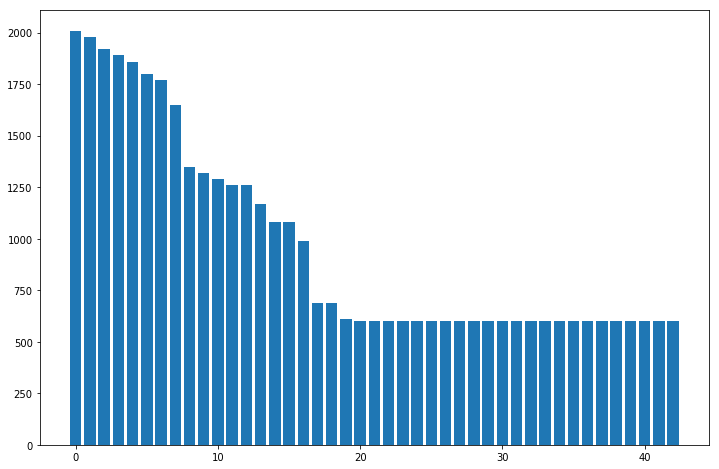

In [24]:
plt.figure(figsize=(12,8))
plt.bar(range(43),height=data_pd_sorted["Occurance"])

# Design and Test a Model Architecture

## Preprocessing

### histogram equalization: 
* reason: The contrast of brightness will be enhanced. Therefore the features will stand out.

In [25]:
img_size = 30

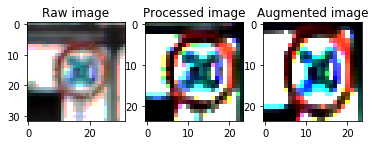

Final image size is (24, 24, 3)


In [28]:
#Some useful image functions
  
def show3img(img, img1, img2):
    plt.figure(figsize=(6, 2))
    plt.subplot(1, 3, 1)
    plt.imshow(img)
    plt.title("Raw image")
    plt.subplot(1, 3, 2)
    plt.imshow(img1)
    plt.title("Processed image")
    plt.subplot(1, 3, 3)
    plt.imshow(img2)
    plt.title("Augmented image")
    plt.show()
    
def eq_Hist(img):
    #Histogram Equalization
    img2=img.copy() 
    img2[:, :, 0] = cv2.equalizeHist(img[:, :, 0])
    img2[:, :, 1] = cv2.equalizeHist(img[:, :, 1])
    img2[:, :, 2] = cv2.equalizeHist(img[:, :, 2])
    return img2

def scale_img(img):
    img2=img.copy()
    sc_y=0.4*np.random.rand()+1.0
    img2=cv2.resize(img, None, fx=1, fy=sc_y, interpolation = cv2.INTER_CUBIC)
    c_x,c_y, sh = int(img2.shape[0]/2), int(img2.shape[1]/2), int(img_size/2)
    return img2

def crop(img, mar=0):
    c_x,c_y, sh = int(img.shape[0]/2), int(img.shape[1]/2), int(img_size/2-mar)
    return img[(c_x-sh):(c_x+sh),(c_y-sh):(c_y+sh)]

def rotate_img(img):
    c_x,c_y = int(img.shape[0]/2), int(img.shape[1]/2)
    ang = 30.0*np.random.rand()-15
    Mat = cv2.getRotationMatrix2D((c_x, c_y), ang, 1.0)
    return cv2.warpAffine(img, Mat, img.shape[:2])

def sharpen_img(img):
    gb = cv2.GaussianBlur(img, (5,5), 20.0)
    return cv2.addWeighted(img, 2, gb, -1, 0)
#Compute linear image transformation ing*s+m
def lin_img(img,s=1.0,m=0.0):
    img2=cv2.multiply(img, np.array([s]))
    return cv2.add(img2, np.array([m]))

#Change image contrast; s>1 - increase
def contr_img(img, s=1.0):
    m=127.0*(1.0-s)
    return lin_img(img, s, m)

def transform_img(img):
    img2=sharpen_img(img)
    img2=crop(img2,3)
    img2=contr_img(img2, 1.5)
    return eq_Hist(img2)

def augment_img(img):
    img=contr_img(img, 1.8*np.random.rand()+0.2)
    img=rotate_img(img)
    img=scale_img(img)
    return transform_img(img)

x_selected = X_train[y_train == 1]
im=x_selected[60, :, :, :]
imp=contr_img(im, 0.5)

show3img(im, transform_img(im), augment_img(im))
print("Final image size is", transform_img(im).shape)

In [73]:
X_train_equalize = list()
X_test_equalize = list()
X_valid_equalize = list()

for i in range(len(X_train)):
    X_train_equalize.append(transform_img(X_train[i]))
for i in range(len(X_test)):
    X_test_equalize.append(transform_img(X_test[i]))    
for i in range(len(X_valid)):
    X_valid_equalize.append(transform_img(X_valid[i]))

In [74]:
X_train_equalize = np.array(X_train_equalize)
X_test_equalize = np.array(X_test_equalize)
X_valid_equalize = np.array(X_valid_equalize)

### normalization: 
* reason: improve learninig speed
* method: scaled images between -.5 and .5, by dividing by 255. and subtracting .5.

In [80]:
X_train_norm = X_train_equalize/255.
X_test_norm = X_test_equalize/255.
X_valid_norm = X_valid_equalize/255.

In [81]:
labels_train = OHE_labels(y_train,43)
labels_test = OHE_labels(y_test,43)
labels_valid = OHE_labels(y_valid,43)

In [82]:
X_train_norm.shape  

(41469, 24, 24, 3)

In [83]:
labels_train.shape

(41469, 43)

### data augmentation: 

* Because of limited data and the class imbalance, additional data was generated by affine transformation including 
    1. **rotation** with random number generated between +/- 40 degress
    2. **translation** by +/- 10 pixels along vertical and horizontal direction
    3. **shearing**

In [78]:
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
    )
datagen.fit(X_train)

## Model

### Model Architechture

In [165]:
reg_weight_decay = np.power(10, -4* np.random.rand(10) )
reg_weight_decay

array([  3.65948974e-03,   1.49699664e-02,   1.66765064e-03,
         9.54684345e-02,   2.10976751e-03,   7.37731642e-04,
         4.09750867e-02,   1.22291726e-04,   1.86311492e-01,
         3.42533035e-01])

In [179]:
def create_model(baseMapNum = 32, weight_decay = 1e-4, num_classes = 43):    
    model = Sequential()
    # 1: convolution
    model.add(Conv2D(baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay), input_shape=X_train_norm.shape[1:]))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # 2: maxpool
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.4))

    # 3: convolution
    model.add(Conv2D(2*baseMapNum, (3,3), padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))

    # 2: maxpool
    model.add(MaxPooling2D(pool_size=(2,2), padding='same'))
    model.add(Dropout(0.4))
    
    model.add(Flatten())
    model.add(Dense(120))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(84))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

In [180]:
model = create_model(baseMapNum = 32, weight_decay = 1e-3, num_classes = 43)

In [181]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 24, 24, 32)        896       
_________________________________________________________________
batch_normalization_13 (Batc (None, 24, 24, 32)        128       
_________________________________________________________________
activation_30 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_25 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 12, 12, 64)        18496     
_________________________________________________________________
batch_normalization_14 (Batc (None, 12, 12, 64)        256       
__________

### Adam

In [182]:
from keras.optimizers import Adam

In [183]:
opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.000001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt_adam,
              metrics=['accuracy'])

In [184]:
model.fit(X_train_norm, labels_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_test_norm, labels_test),
          verbose=1,
          shuffle=True)    
model.save_weights('model//keras_german_sign_ADAM_weighted_Decay_dropout_04.h5')

Train on 41469 samples, validate on 12630 samples
Epoch 1/10
41469/41469 [==============================] - 85s 2ms/step - loss: 3.3247 - acc: 0.1059 - val_loss: 2.4985 - val_acc: 0.3203
Epoch 2/10
41469/41469 [==============================] - 86s 2ms/step - loss: 2.8375 - acc: 0.1755 - val_loss: 2.0951 - val_acc: 0.3911
Epoch 3/10
41469/41469 [==============================] - 88s 2ms/step - loss: 2.5056 - acc: 0.2305 - val_loss: 1.9324 - val_acc: 0.4112
Epoch 4/10
41469/41469 [==============================] - 89s 2ms/step - loss: 2.2994 - acc: 0.2741 - val_loss: 1.7640 - val_acc: 0.4585
Epoch 5/10
41469/41469 [==============================] - 95s 2ms/step - loss: 2.2217 - acc: 0.2976 - val_loss: 1.7557 - val_acc: 0.4538
Epoch 6/10
41469/41469 [==============================] - 96s 2ms/step - loss: 2.1526 - acc: 0.3157 - val_loss: 1.7312 - val_acc: 0.4289
Epoch 7/10
41469/41469 [==============================] - 96s 2ms/step - loss: 2.0797 - acc: 0.3382 - val_loss: 1.6022 - val_acc

In [175]:
scores = model.evaluate(X_valid_norm, labels_valid, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

4410/4410 [==============================] - 4s 865us/step

Test result: 79.819 loss: 0.908


# continue training

In [146]:
from keras.models import load_model
# load_weights only sets the weights of your network. You still need to define its architecture before calling load_weights

In [147]:
model2 = create_model()

In [148]:
model2.load_weights('model//keras_german_sign_ADAM.h5')

In [149]:
opt_adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-8, decay=0.000001)
model2.compile(loss='categorical_crossentropy',
              optimizer=opt_adam,
              metrics=['accuracy'])

In [150]:
model2.fit(X_train_norm, labels_train,
          batch_size=64,
          epochs=10,
          validation_data=(X_test_norm, labels_test),
          verbose=1,
          shuffle=True)    
model2.save_weights('model//keras_german_sign_ADAM_20.h5')

Train on 41469 samples, validate on 12630 samples
Epoch 1/10
41469/41469 [==============================] - 43s 1ms/step - loss: 0.2362 - acc: 0.9248 - val_loss: 0.3560 - val_acc: 0.9016
Epoch 2/10
41469/41469 [==============================] - 42s 1ms/step - loss: 0.2157 - acc: 0.9308 - val_loss: 0.3846 - val_acc: 0.8911
Epoch 3/10
41469/41469 [==============================] - 44s 1ms/step - loss: 0.2100 - acc: 0.9327 - val_loss: 0.3258 - val_acc: 0.9119
Epoch 4/10
41469/41469 [==============================] - 47s 1ms/step - loss: 0.2056 - acc: 0.9350 - val_loss: 0.3442 - val_acc: 0.9069
Epoch 5/10
41469/41469 [==============================] - 48s 1ms/step - loss: 0.1942 - acc: 0.9380 - val_loss: 0.3491 - val_acc: 0.9068
Epoch 6/10
41469/41469 [==============================] - 47s 1ms/step - loss: 0.1873 - acc: 0.9428 - val_loss: 0.3651 - val_acc: 0.9040
Epoch 7/10
41469/41469 [==============================] - 47s 1ms/step - loss: 0.1818 - acc: 0.9426 - val_loss: 0.3407 - val_acc

# test other images

In [152]:
scores = model2.evaluate(X_valid_norm, labels_valid, batch_size=64, verbose=1)
print('\nTest result: %.3f loss: %.3f' % (scores[1]*100,scores[0]))

4410/4410 [==============================] - 2s 366us/step

Test result: 81.066 loss: 1.059
